In [ ]:
#code to make pairwise rmsd heatmaps for the centroids nicely

In [1]:
import mdtraj as md
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mplt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#getting a combined trajectory of all the apo centroids

methods = ['TICA', 'TICA_CBA', 'PCA', 'PCA_CBA', 'GROMOS', 'GROMOS_CBA']

traj = md.load('/home/jegan/final_centroids/XTAL/XTAL_0.pdb')
for method in methods:
    for cen in glob.glob('/home/jegan/final_centroids/'+method+'/*.pdb'):
        for num in range(10):
            if str(num) in cen.split('/')[5]:
                centroid = md.load(cen)
                traj = centroid.join(traj)

traj = traj.superpose(traj,0)
#traj.save_pdb('/home/jegan/centroid_analysis/pairwise_rmsd/centroids/all_APO_cens.pdb')


In [3]:
#getting a pairwise rmsd matrix based on the rmsd of the binding atom indices

binding_atoms = [1024, 1027, 306, 1029, 1031, 1033, 2851, 1035, 1036, 1037, 1038, 1039, 1034, 1040, 1042, 1043, 1044, 1045, 1041, 2854, 1049, 2076,
                 311, 1060, 1061, 1062, 1072, 1074, 1076, 1087, 2112, 2116, 2120, 2122, 2123, 2126, 2135, 323, 2138, 324, 325, 1133, 1134, 1135, 1136,
                 1137, 2170, 330, 3206, 3207, 3208, 3210, 3323, 334, 3219, 336, 2207, 2209, 2210, 2211, 2213, 2214, 2215, 2217, 2219, 2220, 2221, 3244, 
                 1715, 1716, 1743, 1745, 1747, 1749, 2897, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 2837, 328, 329, 2899, 339, 
                 342, 343, 350, 2911, 354, 359, 361, 362, 363, 364, 365, 366, 367, 379, 385, 386, 395, 398, 2449, 2451, 2452, 2453, 2454, 2455, 2456, 
                 2460, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2477, 2478, 941, 2480, 2481, 946, 2834, 944, 2486, 2487, 2488,
                 2835, 2492, 2836, 2494, 963, 2838, 2506, 2507, 2508, 2839, 2510, 972, 978, 979, 980, 2841, 2842, 2844, 997, 2845, 1003, 2846, 1008,
                 1007, 1010, 1009, 2847, 1012, 1013, 1011, 1016, 1017, 1018, 1022]

print(traj.n_frames)
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i,binding_atoms) * 10
print('Max pairwise rmsd: %f angstroms' % np.max(distances))


61
Max pairwise rmsd: 3.435755 angstroms


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


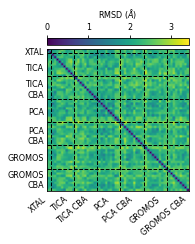

In [4]:
#putting the numpy array data into a pairwise heatmap

import matplotlib as mplt

font = {'family' : 'sans-serif',
        'sans-serif': 'Arial'}

mplt.rc('font', **font)

#plotting the heatmap based of the numpy array calculated above
fig, ax = plt.subplots(figsize = (3.5,3.5)) #figsize (x,y)
im = ax.imshow(distances,cmap = cm.viridis)

#setting axis labels and vertical lines to indicate which clustering method
ax.set_xticks([0,9,18,27,37,49,60])
indx = [1,11,21,31,41,51]
for ind in indx:  
    ax.axvline(ind, c = 'black', linestyle = '--', linewidth = 1)
    
ax.set_yticks([0,7,16,26,36,46,55])
for ind in indx:  
    ax.axhline(ind, c = 'black', linestyle = '--', linewidth = 1)

x_labels = ['XTAL','TICA','TICA CBA','PCA','PCA CBA','GROMOS','GROMOS CBA']
y_labels = ['XTAL','TICA','TICA\nCBA','PCA','PCA\nCBA','GROMOS','GROMOS\nCBA']
ax.set_xticklabels(x_labels, rotation = 40, fontsize = 8, ha = 'right', family = 'Arial')
ax.set_yticklabels(y_labels, fontsize = 8, family = 'Arial')
ax.tick_params(axis=u'both', which=u'both',length=0)

#color bar parameters
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.05, pack_start=False)
fig.add_axes(cax)
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.ax.tick_params(labelsize=8)
cax.xaxis.set_label_position('top')
cax.xaxis.set_ticks_position('top')
cbar.set_label('RMSD ('+r'$\AA$'+')', labelpad = 5, family = 'Arial', fontsize = 8)

#saving out
plt.tight_layout()
#plt.savefig('/home/jegan/centroid_analysis/pairwise_rmsd/figs/pair_rmsd_1.png', dpi = 300)